# <span style="color:darkblue"> QTM 151 - Assignment 10 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [1]:
# Write your answer here
print('Chau Anh Nguyen')

Chau Anh Nguyen


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [17]:
# Write your answer here
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime

<font size = "5">

In this assigment you will work with data on exchange rates, <br>
for two currencies:

- 1 dollar (USD) to chinese yuan (RMB)
- 1 dollar (USD) to japanese yen (JPY).

For this lecture, you will need the material from <br>
Lecture 20 and 22.


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "exchangerates.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 21.


In [54]:
# Write your own code
df = pd.read_csv("data_raw/exchangerates.csv")
df.dtypes
df  

,date_string,usd_to_rmb,usd_to_jpy
0,"1981, Friday, Jan 02",1.5341,202.50
1,"1981, Monday, Jan 05",1.5418,199.05
2,"1981, Tuesday, Jan 06",1.5264,199.70
3,"1981, Wednesday, Jan 07",1.5264,201.05
4,"1981, Thursday, Jan 08",1.5264,201.70
...,...,...,...
11016,"2023, Monday, Mar 27",6.8834,131.49
11017,"2023, Tuesday, Mar 28",6.8725,130.97
11018,"2023, Wednesday, Mar 29",6.8862,132.69
11019,"2023, Thursday, Mar 30",6.8700,132.71


In [55]:
df['date_string'] = pd.to_datetime(df['date_string'], format = "%Y, %A, %b %d")

<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "usd_to_rmb" and "usd_to_jpy" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 USD to RMB" and "1 USD to JPY"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


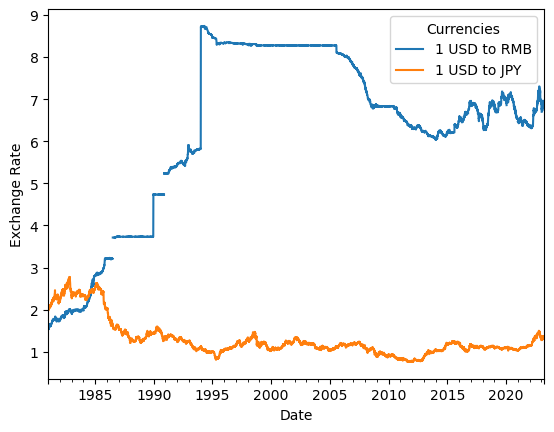

In [56]:
# Write your own code
df['jpy_rescale'] = df['usd_to_jpy']/100 #rescaling currency

df[["date_string","usd_to_rmb","jpy_rescale"]].set_index("date_string").plot()

plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend(labels = ["1 USD to RMB", "1 USD to JPY"], title = "Currencies")


<font size = "5">

(c) Flag subset of data and plot

<font size = "3">

- Create a boolean vector (True/False) "bool_cond" which checks whether <br>
"usd_to_jpy" is below 100
- Generate a line plot with the "usd_to_jpy" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



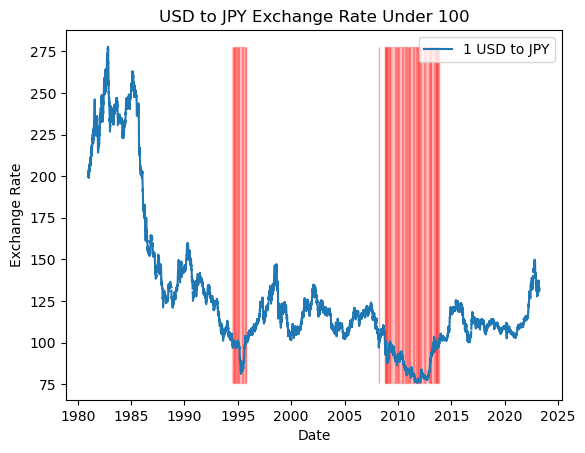

In [57]:
# Write your own code
bool_cond = df["usd_to_jpy"] < 100
plt.plot("date_string", "usd_to_jpy", data = df)
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend(["1 USD to JPY"])
plt.title('USD to JPY Exchange Rate Under 100')

plt.fill_between(x = df['date_string'],
                y1 = df['usd_to_jpy'].min(),
                y2 = df['usd_to_jpy'].max(),
                where=bool_cond,color='red', alpha=0.2)

plt.show()



<font size = "5">

(d) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the date column and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "usd_to_rmb"
- Display the dataset




In [58]:
# Write your own code
month_config = pd.Grouper(key= 'date_string', freq='m')
df.groupby(month_config).agg(rmb_std = ("usd_to_rmb","std")).reset_index()

,date_string,rmb_std
0,1981-01-31,0.019149
1,1981-02-28,0.015432
2,1981-03-31,0.012636
3,1981-04-30,0.017154
4,1981-05-31,0.017583
...,...,...
502,2022-11-30,0.077405
503,2022-12-31,0.028203
504,2023-01-31,0.052152
505,2023-02-28,0.067344


<font size = "5">

(e) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["usd_to_rmb","usd_to_jpy"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [59]:
# Write your own code
long_format = pd.melt(df, var_name='type',
                       value_name='exchange_rate',
                       id_vars=['date_string'],
                       value_vars=['usd_to_rmb','usd_to_jpy'])

long_format.sort_values(by='date_string')


,date_string,type,exchange_rate
0,1981-01-02,usd_to_rmb,1.5341
11021,1981-01-02,usd_to_jpy,202.5000
11022,1981-01-05,usd_to_jpy,199.0500
1,1981-01-05,usd_to_rmb,1.5418
2,1981-01-06,usd_to_rmb,1.5264
...,...,...,...
11018,2023-03-29,usd_to_rmb,6.8862
22040,2023-03-30,usd_to_jpy,132.7100
11019,2023-03-30,usd_to_rmb,6.8700
11020,2023-03-31,usd_to_rmb,6.8676
